In [300]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import prepare
import acquire

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using a different max_depth value.

Which model performs better on your in-sample data?

Which model performs best on your out-of-sample data, the validate set?

In [301]:
df = prepare.prep_titanic()

In [302]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [303]:
df.sex = df.sex.map({'male': 1, 'female': 0}).astype(int)

In [304]:
df = df.drop(columns=['embark_town', 'passenger_id', 'sex_male'])

In [305]:
df.head()

,survived,pclass,sex,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,1,0,7.2500,0,0,1
1,1,1,0,1,0,71.2833,0,0,0
2,1,3,0,0,0,7.9250,1,0,1
3,1,1,0,1,0,53.1000,0,0,1
4,0,3,1,0,0,8.0500,1,0,1


In [306]:
train, validate, test = prepare.split_data(df, 'survived')

In [307]:
train.shape, validate.shape, test.shape

((534, 9), (178, 9), (179, 9))

In [308]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [309]:
# baseline prediction = did not survive

baseline = len(train[train.survived == 0]) / len(train)
baseline

0.6161048689138576

In [310]:
model1 = DecisionTreeClassifier()

In [374]:
X_col = ['pclass', 'alone', 'sex']
y_col = 'survived'

In [375]:
X_train, y_train = train[X_col], train[y_col]
X_validate, y_validate = validate[X_col], validate[y_col]

In [313]:
X_train.head()

,pclass,alone,sex
782,1,1,1
643,3,1,1
815,1,1,1
633,1,1,1
411,3,1,1


In [314]:
model1.fit(X_train, y_train)
print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 78.28%
validate score: 83.71%


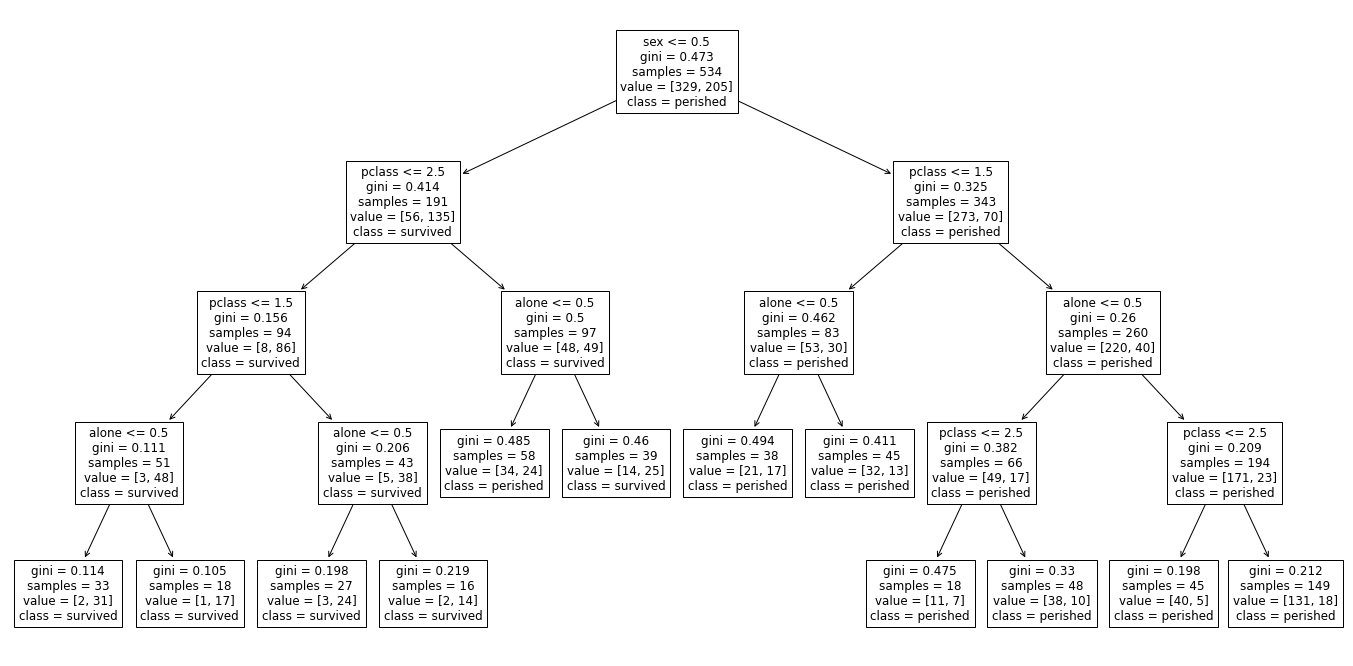

In [315]:
plt.figure(figsize=(24,12))
plot_tree(model1, feature_names=X_train.columns.to_list(), class_names=['perished', 'survived']);

In [316]:
model2 = DecisionTreeClassifier(max_depth=3)
X_col2 = ['pclass', 'fare', 'sex']
y_col2 = 'survived'

In [317]:
X_train2, y_train2 = train[X_col2], train[y_col2]
X_validate2, y_validate2 = validate[X_col2], validate[y_col2]

In [318]:
model2.fit(X_train2, y_train2)
print(f'training score: {model2.score(X_train2, y_train2):.2%}')
print(f'validate score: {model2.score(X_validate2, y_validate2):.2%}')

training score: 79.40%
validate score: 84.27%


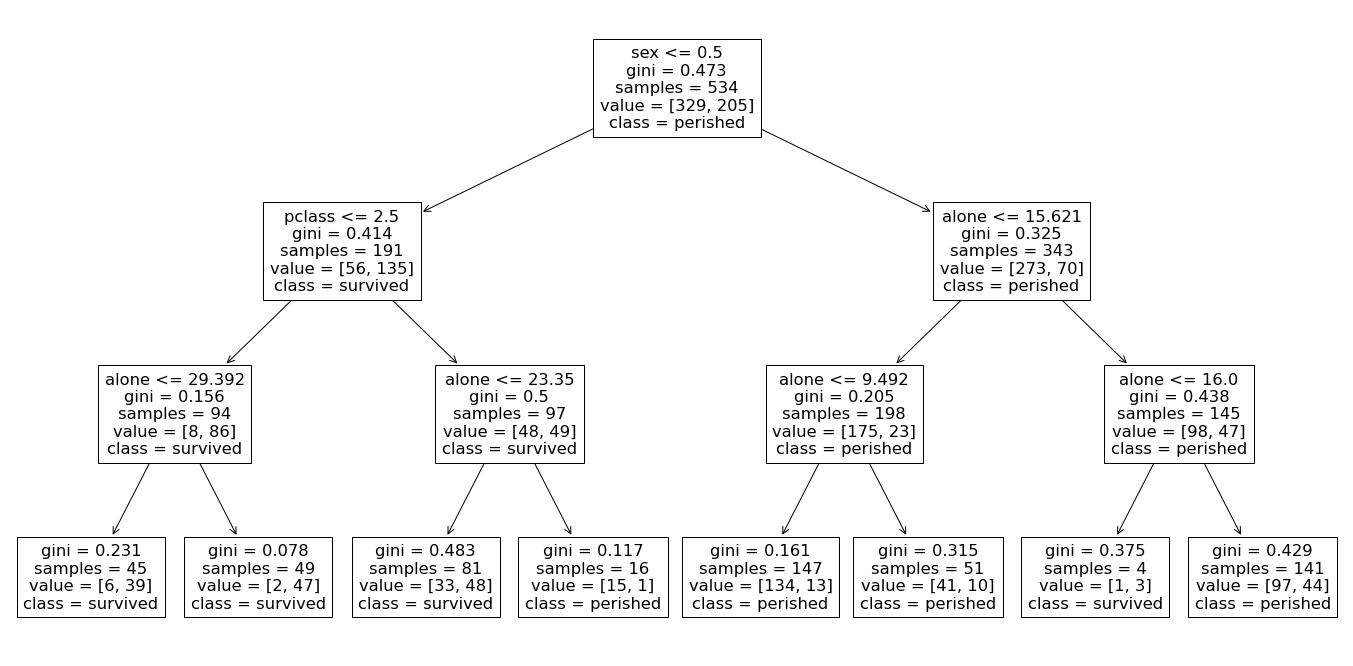

In [319]:
plt.figure(figsize=(24,12))
plot_tree(model2, feature_names=X_train.columns.to_list(), class_names=['perished', 'survived']);

In [320]:
y_preds = pd.DataFrame(
{
    'y_actual': y_validate.values,
    'baseline': 0,
    'model_1': model1.predict(X_validate[X_col]),
    'model_2': model2.predict(X_validate2[X_col2]),
})

In [321]:
pd.DataFrame(classification_report(y_preds.y_actual, y_preds.model_1, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.824000,0.867925,0.837079,0.845962,0.840780
recall,0.936364,0.676471,0.837079,0.806417,0.837079
f1-score,0.876596,0.760331,0.837079,0.818463,0.832180
support,110.000000,68.000000,0.837079,178.000000,178.000000


In [322]:
y_preds.head()

,y_actual,baseline,model_1,model_2
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,0,1,1
4,0,0,0,0


In [323]:
(y_preds.y_actual == y_preds.baseline).mean()

0.6179775280898876

In [324]:
pd.DataFrame(classification_report(y_preds.y_actual, y_preds.model_1, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.824000,0.867925,0.837079,0.845962,0.840780
recall,0.936364,0.676471,0.837079,0.806417,0.837079
f1-score,0.876596,0.760331,0.837079,0.818463,0.832180
support,110.000000,68.000000,0.837079,178.000000,178.000000


In [325]:
pd.DataFrame(classification_report(y_preds.y_actual, y_preds.model_2, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.853448,0.822581,0.842697,0.838014,0.841656
recall,0.900000,0.750000,0.842697,0.825000,0.842697
f1-score,0.876106,0.784615,0.842697,0.830361,0.841155
support,110.000000,68.000000,0.842697,178.000000,178.000000


Work through these same exercises using the Telco dataset.

In [326]:
telco = prepare.prep_telco()

/Users/dashiellbringhurst/codeup-data-science/classification-exercises/prepare.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  telco['payment_type'] = telco.payment_type.str.replace('(','').str.replace(')', '').str.replace('Bank transfer automatic', 'auto').str.replace('Credit card automatic', 'auto')
/Users/dashiellbringhurst/codeup-data-science/classification-exercises/prepare.py:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  telco['total_charges'] = telco.total_charges.str.replace('$','').str.replace(',','').str.replace(' ','').fillna(0)


In [327]:
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,0,0,1,1,9,1,...,Yes,Yes,No,1,65.6,593.30,0,One year,DSL,manual
1,2,1,1,0003-MKNFE,1,0,0,0,9,1,...,No,No,Yes,0,59.9,542.40,0,Month-to-month,DSL,manual
2,1,2,1,0004-TLHLJ,1,0,0,0,4,1,...,No,No,No,1,73.9,280.85,1,Month-to-month,Fiber optic,manual
3,1,2,1,0011-IGKFF,1,1,1,0,13,1,...,No,Yes,Yes,1,98.0,1237.85,1,Month-to-month,Fiber optic,manual
4,2,2,1,0013-EXCHZ,0,1,1,0,3,1,...,Yes,Yes,No,1,83.9,267.40,1,Month-to-month,Fiber optic,manual


In [328]:
train_telco, validate_telco, test_telco = prepare.split_data(telco, 'churn')

In [329]:
train_telco.shape, validate_telco.shape, test_telco.shape

((4225, 24), (1409, 24), (1409, 24))

In [330]:
train_telco.churn.value_counts()

0    3104
1    1121
Name: churn, dtype: int64

In [331]:
telco_baseline = len(train_telco[train_telco.churn == 0]) / len(train_telco)
telco_baseline

0.7346745562130178

In [332]:
telco_model1 = DecisionTreeClassifier(max_depth=3)

In [333]:
X_telco = ['contract_type_id', 'tenure', 'monthly_charges']
y_telco = 'churn'

In [334]:
X_train_telco, y_train_telco = train_telco[X_telco], train_telco[y_telco]
X_validate_telco, y_validate_telco = validate_telco[X_telco], validate_telco[y_telco]

In [335]:
X_train_telco.head()

,contract_type_id,tenure,monthly_charges
621,3,61,80.80
2607,1,1,19.75
6443,1,1,20.30
409,2,45,78.75
4058,3,65,99.05


In [336]:
telco_model1.fit(X_train_telco, y_train_telco)
print(f'training score: {telco_model1.score(X_train_telco, y_train_telco):.2%}')
print(f'validate score: {telco_model1.score(X_validate_telco, y_validate_telco):.2%}')

training score: 78.70%
validate score: 79.13%


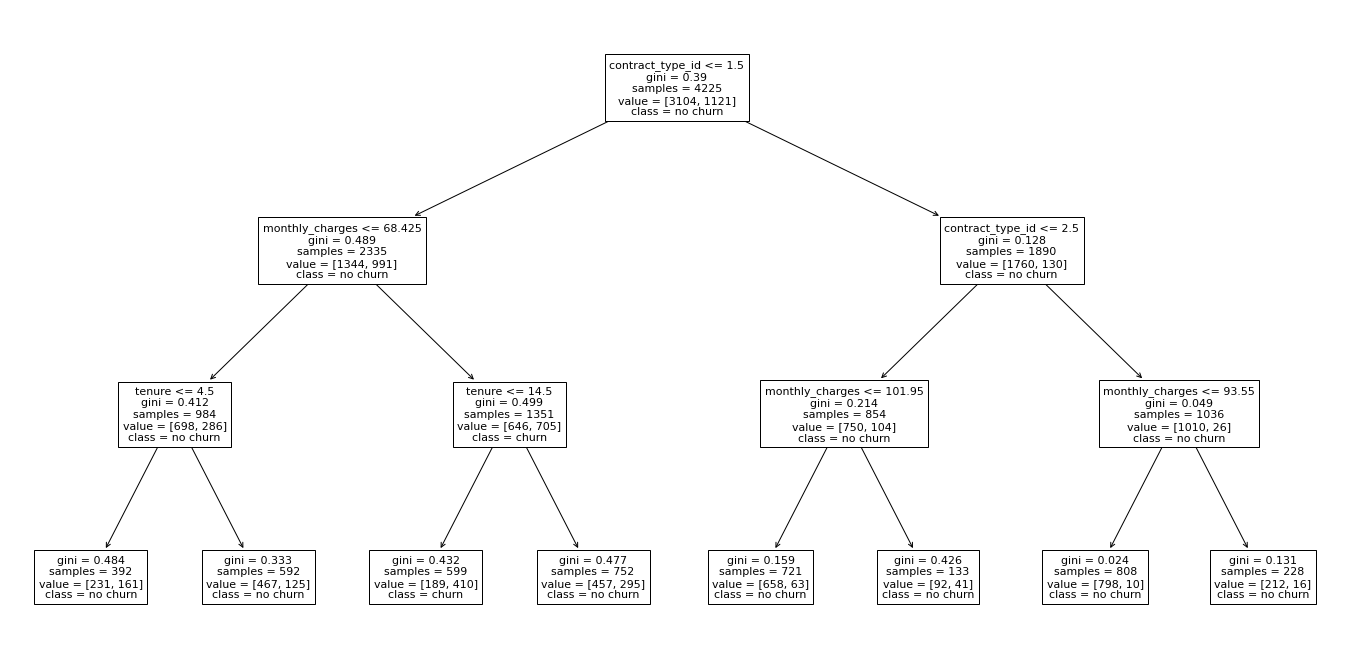

In [337]:
plt.figure(figsize=(24,12))
plot_tree(telco_model1, feature_names=X_train_telco.columns.to_list(), class_names=['no churn', 'churn']);

In [338]:
telco_model2 = DecisionTreeClassifier(max_depth=3)
X_telco2 = ['tenure', 'internet_service_type_id', 'dependents']
y_telco2 = 'churn'

In [339]:
X_train_telco2, y_train_telco2 = train_telco[X_telco2], train_telco[y_telco2]
X_validate_telco2, y_validate_telco2 = validate_telco[X_telco2], validate_telco[y_telco2]

In [340]:
X_train_telco2.head()

,tenure,internet_service_type_id,dependents
621,61,1,0
2607,1,3,0
6443,1,3,0
409,45,1,1
4058,65,2,1


In [341]:
telco_model2.fit(X_train_telco2, y_train_telco2)
print(f'training score: {telco_model2.score(X_train_telco2, y_train_telco2):.2%}')
print(f'validate score: {telco_model2.score(X_validate_telco2, y_validate_telco2):.2%}')

training score: 78.60%
validate score: 79.77%


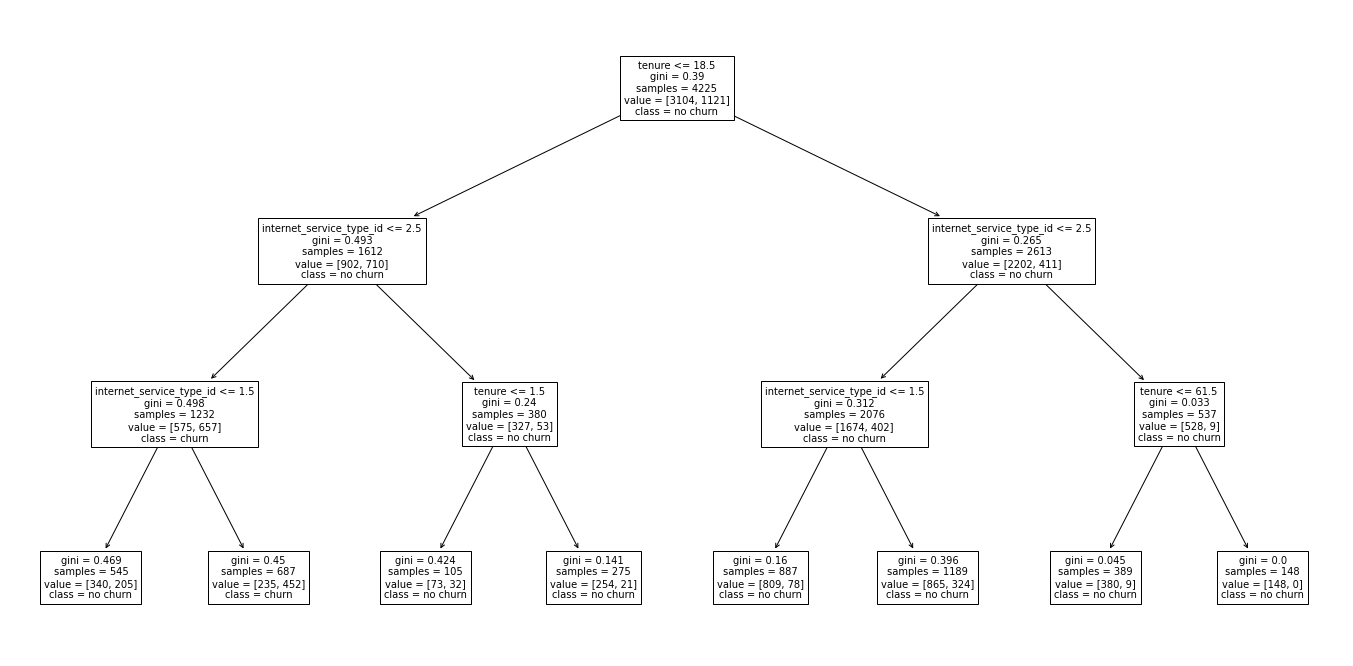

In [342]:
plt.figure(figsize=(24,12))
plot_tree(telco_model2, feature_names=X_train_telco2.columns.to_list(), class_names=['no churn', 'churn']);

In [343]:
y_preds_telco = pd.DataFrame(
{
    'y_actual': y_validate_telco.values,
    'baseline': 0,
    'model_1': telco_model1.predict(X_validate_telco[X_telco]),
    'model_2': telco_model2.predict(X_validate_telco2[X_telco2]),
})

In [344]:
y_preds_telco.head()

,y_actual,baseline,model_1,model_2
0,0,0,0,0
1,0,0,0,0
2,0,0,1,1
3,0,0,0,0
4,0,0,0,0


In [345]:
pd.DataFrame(classification_report(y_preds_telco.y_actual, y_preds_telco.model_1, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.809524,0.688679,0.791341,0.749102,0.777447
recall,0.936232,0.390374,0.791341,0.663303,0.791341
f1-score,0.868280,0.498294,0.791341,0.683287,0.770072
support,1035.000000,374.000000,0.791341,1409.000000,1409.000000


In [346]:
(y_preds_telco.y_actual == y_preds_telco.baseline).mean()

0.7345635202271115

In [347]:
pd.DataFrame(classification_report(y_preds_telco.y_actual, y_preds_telco.model_2, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.822165,0.681633,0.797729,0.751899,0.784863
recall,0.924638,0.446524,0.797729,0.685581,0.797729
f1-score,0.870396,0.539580,0.797729,0.704988,0.782585
support,1035.000000,374.000000,0.797729,1409.000000,1409.000000


Experiment with this model on other datasets with a higher number of output classes.

Continue working in your model file with titanic data to do the following:

Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

Evaluate your results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps increasing your min_samples_leaf and decreasing your max_depth.

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [348]:
model5 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=1, 
                                 n_estimators=100, max_depth=10, random_state=123)

In [349]:
X_col = train.drop(columns='survived')

In [350]:
X_train, y_train = X_col, train[y_col]
X_validate, y_validate = X_col, validate[y_col]

In [351]:
model5.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [352]:
print(model5.feature_importances_)

[0.08412772 0.28356702 0.07435099 0.06628185 0.4107098  0.02761746
 0.01631214 0.03703302]


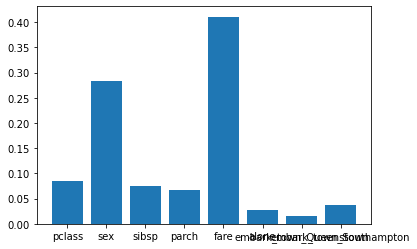

In [353]:
plt.bar(X_train.columns, model5.feature_importances_)
plt.show()

In [354]:
y_pred = model5.predict(X_train)

In [355]:
y_pred_proba = model5.predict_proba(X_train)

In [356]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(model5.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.91


In [357]:
cm = confusion_matrix(y_train, y_pred)

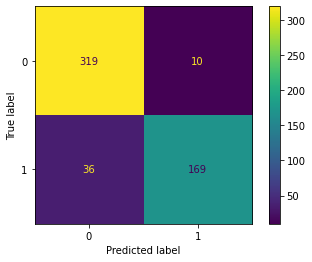

In [358]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model5.classes_)

disp.plot()
plt.show()

In [359]:
TN = 319
TP = 169
FN = 36
FP = 10

In [360]:
ALL = TN + TP + FN + FP

In [361]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.9138576779026217
True Positive Rate: 0.824390243902439
False Positive Rate: 0.030395136778115502
True Negative Rate: 0.9696048632218845
False Negative Rate: 0.17560975609756097
Precision: 0.9441340782122905
Recall: 0.824390243902439
F1 Score: 0.8802083333333334
Support (0): 205
Support (1): 329


In [159]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       329
           1       0.94      0.82      0.88       205

    accuracy                           0.91       534
   macro avg       0.92      0.90      0.91       534
weighted avg       0.92      0.91      0.91       534



In [238]:
X_validate = validate.drop(columns='survived')

In [164]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(model5.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.83


In [230]:
model6 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=2, 
                                 n_estimators=100, max_depth=9, random_state=123)

In [231]:
model6.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, random_state=123)

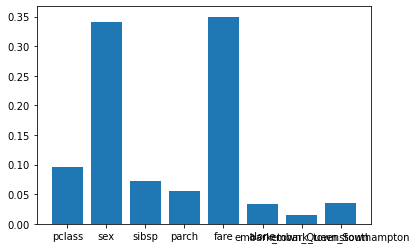

In [232]:
plt.bar(X_train.columns, model6.feature_importances_)
plt.show()

In [239]:
y_pred = model6.predict(X_train)
y_pred_proba = model6.predict_proba(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(model6.score(X_train, y_train)))
print(classification_report(y_train, y_pred))

Accuracy of random forest classifier on training set: 0.87
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       329
           1       0.90      0.76      0.82       205

    accuracy                           0.87       534
   macro avg       0.88      0.85      0.86       534
weighted avg       0.88      0.87      0.87       534



In [241]:
y_pred = model6.predict(X_validate)
y_pred_proba = model6.predict_proba(X_validate)
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(model6.score(X_validate, y_validate)))
print(classification_report(y_validate, y_pred))

Accuracy of random forest classifier on test set: 0.82
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        68

    accuracy                           0.82       178
   macro avg       0.81      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178



In [242]:
model7 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=3, 
                                 n_estimators=100, max_depth=8, random_state=217)

In [243]:
model7.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, random_state=123)

In [244]:
y_pred = model7.predict(X_train)
y_pred_proba = model7.predict_proba(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(model7.score(X_train, y_train)))
print(classification_report(y_train, y_pred))

Accuracy of random forest classifier on training set: 0.86
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       329
           1       0.91      0.71      0.80       205

    accuracy                           0.86       534
   macro avg       0.87      0.83      0.85       534
weighted avg       0.87      0.86      0.86       534



In [246]:
y_pred = model7.predict(X_validate)
y_pred_proba = model7.predict_proba(X_validate)
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(model7.score(X_validate, y_validate)))
print(classification_report(y_validate, y_pred))

Accuracy of random forest classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.69      0.74        68

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



In [247]:
model8 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=4, 
                                 n_estimators=100, max_depth=7, random_state=217)

In [248]:
model8.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=4, random_state=123)

In [249]:
y_pred = model8.predict(X_train)
y_pred_proba = model8.predict_proba(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(model8.score(X_train, y_train)))
print(classification_report(y_train, y_pred))

Accuracy of random forest classifier on training set: 0.83
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       329
           1       0.86      0.67      0.75       205

    accuracy                           0.83       534
   macro avg       0.84      0.80      0.81       534
weighted avg       0.83      0.83      0.83       534



In [250]:
y_pred = model8.predict(X_validate)
y_pred_proba = model8.predict_proba(X_validate)
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(model8.score(X_validate, y_validate)))
print(classification_report(y_validate, y_pred))

Accuracy of random forest classifier on test set: 0.84
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       110
           1       0.87      0.69      0.77        68

    accuracy                           0.84       178
   macro avg       0.85      0.81      0.83       178
weighted avg       0.85      0.84      0.84       178



In [251]:
model9 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=5, 
                                 n_estimators=100, max_depth=6, random_state=217)

In [252]:
model9.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=123)

In [253]:
y_pred = model9.predict(X_train)
y_pred_proba = model9.predict_proba(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(model9.score(X_train, y_train)))
print(classification_report(y_train, y_pred))

Accuracy of random forest classifier on training set: 0.82
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       329
           1       0.86      0.64      0.74       205

    accuracy                           0.82       534
   macro avg       0.84      0.79      0.80       534
weighted avg       0.83      0.82      0.82       534



In [254]:
y_pred = model9.predict(X_validate)
y_pred_proba = model9.predict_proba(X_validate)
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(model9.score(X_validate, y_validate)))
print(classification_report(y_validate, y_pred))

Accuracy of random forest classifier on test set: 0.83
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.71      0.76        68

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



In [255]:
model10 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=6, 
                                 n_estimators=100, max_depth=5, random_state=217)

In [256]:
model10.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=6, random_state=123)

In [257]:
y_pred = model10.predict(X_train)
y_pred_proba = model10.predict_proba(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(model10.score(X_train, y_train)))
print(classification_report(y_train, y_pred))

Accuracy of random forest classifier on training set: 0.81
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       329
           1       0.83      0.63      0.72       205

    accuracy                           0.81       534
   macro avg       0.82      0.78      0.79       534
weighted avg       0.81      0.81      0.80       534



In [258]:
y_pred = model10.predict(X_validate)
y_pred_proba = model10.predict_proba(X_validate)
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(model10.score(X_validate, y_validate)))
print(classification_report(y_validate, y_pred))

Accuracy of random forest classifier on test set: 0.83
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        68

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



- Model 5 had an 91% accuracy on the training data, but only 83% accuracy on the validate data. The random forest was overfitted to the training data.

- Model 6 performed slightly better (+1 leaf, -1 depth) but there was still a 5% drop in accuracy between the train and validate sets.

- Model 7 had the same drop in accuracy as model 6, but the overall accuracy for both sets was less than model 6.

- Model 8 had a consistent accuracy rate for both the train and validate data (83 and 84 percent, respectively) and appears to be the most valuable model for accuracy. The minimum sample leaf was set to 5 and max depth was 6.

- Model 9 also had a consistent accuracy rate, but the overall accuracy was less than Model 9.

- Model 10 is less consistent and less accurate than model 9 but is still better than baseline.


### KNN

Continue working in your model file with the titanic dataset.

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 setting k to 10

Run through setps 2-4 setting k to 20

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

Which model performs best on our out-of-sample data from validate?

In [565]:
train, validate, test = prepare.split_data(df, 'survived')

In [566]:
X_col = ['pclass', 'alone', 'sex', 'fare']
y_col = 'survived'

In [567]:
X_train, y_train = train[X_col], train[y_col]
X_validate, y_validate = validate[X_col], validate[y_col]

In [568]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [569]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [570]:
y_pred = knn.predict(X_train)

In [571]:
y_pred_proba = knn.predict_proba(X_train)

In [572]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.81


In [573]:
print(confusion_matrix(y_train, y_pred))

[[291  38]
 [ 61 144]]


In [574]:
cm = confusion_matrix(y_train, y_pred)

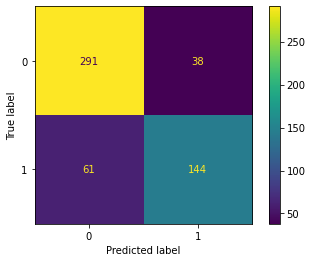

In [575]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

disp.plot()
plt.show()

In [576]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN


(144, 291, 38, 61)

In [577]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8146067415730337
True Positive Rate: 0.7024390243902439
False Positive Rate: 0.11550151975683891
True Negative Rate: 0.8844984802431611
False Negative Rate: 0.2975609756097561
Precision: 0.7912087912087912
Recall: 0.7024390243902439
F1 Score: 0.7441860465116278
Support (0): 205
Support (1): 329


In [578]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       329
           1       0.79      0.70      0.74       205

    accuracy                           0.81       534
   macro avg       0.81      0.79      0.80       534
weighted avg       0.81      0.81      0.81       534



In [579]:
y_pred = knn.predict(X_validate)
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.79


In [598]:
knn1 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [599]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [600]:
y_pred = knn1.predict(X_train)
y_pred_proba = knn1.predict_proba(X_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [601]:
print(confusion_matrix(y_train, y_pred))

[[290  39]
 [ 75 130]]


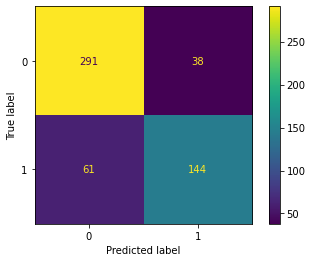

In [602]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn1.classes_)

disp.plot()
plt.show()

In [603]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN


(130, 290, 39, 75)

In [604]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7865168539325843
True Positive Rate: 0.6341463414634146
False Positive Rate: 0.11854103343465046
True Negative Rate: 0.8814589665653495
False Negative Rate: 0.36585365853658536
Precision: 0.7692307692307693
Recall: 0.6341463414634146
F1 Score: 0.6951871657754011
Support (0): 205
Support (1): 329


In [605]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       329
           1       0.77      0.63      0.70       205

    accuracy                           0.79       534
   macro avg       0.78      0.76      0.77       534
weighted avg       0.78      0.79      0.78       534



In [606]:
y_pred = knn1.predict(X_validate)
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn2.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.74


In [589]:
knn2 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [590]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [591]:
y_pred = knn2.predict(X_train)
y_pred_proba = knn2.predict_proba(X_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn2.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.74


In [592]:
print(confusion_matrix(y_train, y_pred))

[[270  59]
 [ 82 123]]


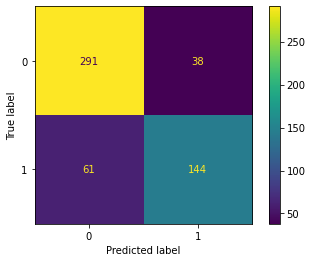

In [593]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn2.classes_)

disp.plot()
plt.show()

In [594]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(123, 270, 59, 82)

In [595]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7359550561797753
True Positive Rate: 0.6
False Positive Rate: 0.17933130699088146
True Negative Rate: 0.8206686930091185
False Negative Rate: 0.4
Precision: 0.6758241758241759
Recall: 0.6
F1 Score: 0.6356589147286822
Support (0): 205
Support (1): 329


In [596]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       329
           1       0.68      0.60      0.64       205

    accuracy                           0.74       534
   macro avg       0.72      0.71      0.71       534
weighted avg       0.73      0.74      0.73       534



In [597]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn2.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.74


In [609]:
metrics = []

for i in range(1, 26):
    # Make the model
    k_titanic = KNeighborsClassifier(n_neighbors=i)

    # Fit the model (on train and only train)
    k_titanic = k_titanic.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = k_titanic.score(X_train, y_train)
    
    out_of_sample_accuracy = k_titanic.score(X_validate, y_validate)

    output = {
        "neighbors": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,neighbors,train_accuracy,validate_accuracy,difference
0,1,0.889513,0.758427,0.131086
1,2,0.823970,0.719101,0.104869
2,3,0.850187,0.758427,0.091760
3,4,0.805243,0.730337,0.074906
4,5,0.814607,0.792135,0.022472
5,6,0.799625,0.741573,0.058052
6,7,0.803371,0.792135,0.011236
7,8,0.805243,0.786517,0.018727
8,9,0.795880,0.775281,0.020599
9,10,0.786517,0.758427,0.028090


- The model with K=11 performs best for accuracy with the selected features.